In [1]:
# Setting up the notebook
import sys
import os

# Import local libraries
sys.path.append('../SUPPORT_REPO/src/scripts/scripts_exercises')
from formulation_problems import transport_matching, transport_observation_matching, transport_gaussian_plot, transport_boundary_condition_matching
from solution_transport import question_tracer_propagation_plot, plot_curve_and_question_estimation

# Exercise 6 : Transport Problems

## Context :

When solving groundwater problems, another important part of the work consists in defining and solving the transport problem.
This includes for any studied groundwater system:
- identifying transport boundary conditions
- formulating the transport analytical equations to be solved
- solving the transport equations, analytically or numerically

## Task 1 : Boundary conditions


- **Match the correct expression to each possible boundary condition**:

In [2]:
transport_boundary_condition_matching()

$c(x,t) = c_1(x,t)$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', '3rd type : prescribed mass flux', '2nd type…

HTML(value='')

$\frac{\partial c(x,t)}{\partial n} = 0$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', '3rd type : prescribed mass flux', '2nd type…

HTML(value='')

$j_n=q_nc(x,t)-\phi_e D_h \frac{\partial c(x,t)}{\partial n}$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', '3rd type : prescribed mass flux', '2nd type…

HTML(value='')

Button(description='Submit', style=ButtonStyle())

Output()

## Task 2 : Analytical formulation of simple problems

The transport equation formulation is the following :

$\partial_t c_{tot} (x,y,z,t) = - \Delta \cdot \Sigma \left( \vec{j_i}(x,y,z,t) \right) +P(x,y,z,t)$

Where the terms $\vec{j_i}$ refer to the possible mass fluxes : advection, diffusion and dispersion; and $P$ to possible source or sink terms.


- **Match the correct expression to each presented simple transport equation:**


In [3]:
transport_matching()

$\vec{j_1} = \phi_e \vec{u} c = \vec{q} c$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', 'Advection term', 'Molecular diffusion term'…

HTML(value='')

$\vec{j_2} = - \phi_e \bold{D_{me}} \vec{\nabla}c$, where $\bold{D_{me}}$ is about $10^{-9} m^2/s^{-1}$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', 'Advection term', 'Molecular diffusion term'…

HTML(value='')

$\vec{j_3} = - \phi_e \bold{D} \vec{\nabla}c$, where $\bold{D}$ is a tensor : $D_{ij}=\frac{1}{\mid u \mid} u_i u_j (\alpha_l-\alpha_t)$

Dropdown(layout=Layout(width='300px'), options=('--- select ---', 'Advection term', 'Molecular diffusion term'…

HTML(value='')

Button(description='Submit', style=ButtonStyle())

Output()

## Task 3 : Analytical solution to line injection

The 2D analytical solution for the transport of an instantaneous line injection in uniform flow field is :

$c(x,y,t)=\frac{M/(\phi_e m)}{2\pi\sqrt{2 D_L t \cdot 2 D_T t}}\exp{((-\frac{(x-ut)^2}{4D_L t})-\frac{(y)^2}{4D_T t})}$ 

where 
- $D_L=a_L u$ is the longitudinal mechanical dispersion coefficient
- $D_T=a_T u$ is the transversal mechanical dispersion coefficient
- $M$ is the pollutant mass
- $u$ is the mean flow velocity 
- $m$ is the acquifer thickness
- $\phi_e$ is the effective porosity


- **Manipulate the interactive plot to guess what effects have advection, diffusion and dispersion on the transport analytical solution:**

In [ ]:
transport_gaussian_plot()
transport_observation_matching()

Output()

Translation of the peak location in time :

Dropdown(layout=Layout(width='300px'), options=('--- select ---', 'Diffusion and dispersion term', 'Advection …

HTML(value='')

Change in the peak width (spread) with time :

Dropdown(layout=Layout(width='300px'), options=('--- select ---', 'Diffusion and dispersion term', 'Advection …

HTML(value='')

Button(description='Submit', style=ButtonStyle())

Output()

## Task 4 : Field analysis of tracer line injection

In most of the case, there is only one monitoring field. 
So it is not possible to interpolate an analytical solution of the concentration spatial profile, but only a temporal profile at the well.

In our field experiment : 
- Flow : it can be assumed to be uniform. 
- Solute release : 10 kg of a water soluble substance is released in a Well 1. It is highly mobile well mixed in a
very short time inside the Well 1, such that it behaves lake an instantaneous release of an ideal tracer. 
- Observation well : at a distance of 400 m from Well 1 is located Well 2, where the concentration in solute is meased in time.

Available data:
- Mean flow velocity $u$ = 10 m/day.
- Groundwater table $h$ = 50 m (reference datum z = 0 set at the bottom of the aquifer).
- Effective porosity $\phi_e$ = 0.2.
- Longitudinal dispersivity $\alpha_l$ = 10 m.
- Transversal dispersivity $\alpha_t$ = 0.1 m.


### Task 4.1:
- **From the three plots below, which one do you think could be representing the concentration of solute in Well 2 given the mean flow velocity?**

Output()

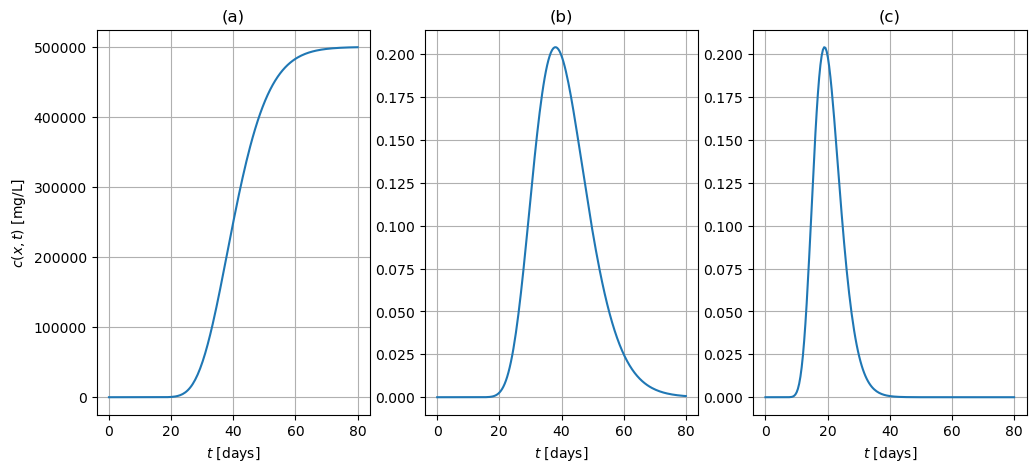

In [5]:
question_tracer_propagation_plot()

### Task 4.2 : 
Now we know which curves show the time evolution of solute concentration in well 2, we can extract some more information regarding the contamination that occured in the field. The reference concentration treshold is 0.05 mg/L.

- **Derive the required contamination indicators** (maximum concentration at observation well and time span above limit concentration):

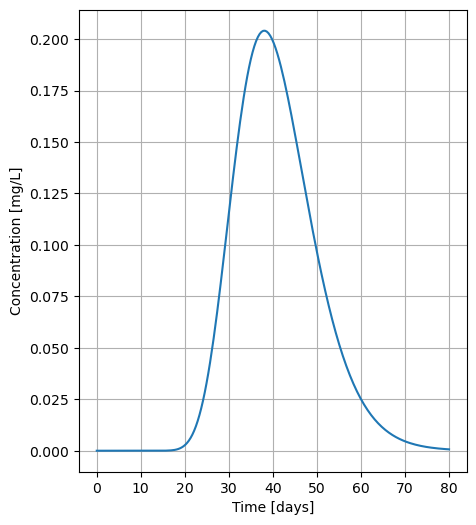

From the concentration curve (b), determine:

FloatText(value=0.0, description='Maximum concentration [mg/L]:', layout=Layout(width='500px'), style=Descript…

FloatText(value=0.0, description='Time span above reference concentration [days]:', layout=Layout(width='500px…

Button(description='Submit', style=ButtonStyle())

Output()

In [6]:
plot_curve_and_question_estimation()